In [230]:
import sys
#!{sys.executable} -m pip install pymongo
#!{sys.executable} -m pip install pyyaml
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install isoweek

#!{sys.executable} -m pip install rpy2

In [231]:

import os
print(os.getcwd())
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("EXT_URI"))
db = client[getsecret("MOBILE_NAME")]
ext_client = MongoClient(getsecret("EXT_URI"))

ext_db = ext_client[getsecret("DB_NAME")]
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))


### CONSTANTS ###
INTENSITY = "intensity"
TOTAL_TIME = "total_time"
ANDROID = "android"
HASH = "email_hash"
INSTALL = "install_id"
GOALS = "goals"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
OTHER_TIME = "other_time"
FREQ_TIME ="freq_time"
GOAL_TIME = "goal_time"
TARGET_TIME = "target_time"
BROWSER = "browser"
BROWSER_DOMAIN = "browser_domain"
GOAL_TIMES = "goal_frequency_days"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
BROWSER = "browser"
FREQUENCY = "frequency"
TIME = "time"
GOAL = "goal"
SPEND_LESS_TIME_LENGTH = len("custom/spend_less_time_")
AVG_FREQ_TIME = "avg_freq_time"
AVG_INFREQ_TIME = "avg_infreq_time"
AVG_GOAL_TIME = "avg_goal_time"
UNPRODUCTIVE_TIME = "unproductive_time"
PRODUCTIVE_TIME = "productive_time"
INFREQ_TIME = "infreq_time"
NUM_FREQ_GOALS = "num_freq_goals"
NUM_INFREQ_GOALS = "num_infreq_goals"
import time


### FUNCTIONS ###
# Get freq stats
# week -> goal -> freq
# Top-level-domain-names that are not pertinent to the application.
TLDs = ['aaa', 'abb', 'abc', 'ac', 'aco', 'ad', 'ads', 'ae', 'aeg', 'af', 'afl', 'ag', 'ai', 'aig', 'al', 'am', 'anz', 'ao', 'aol', 'app', 'aq', 'ar', 'art', 'as', 'at', 'au', 'aw', 'aws', 'ax', 'axa', 'az', 'ba', 'bar', 'bb', 'bbc', 'bbt', 'bcg', 'bcn', 'bd', 'be', 'bet', 'bf', 'bg', 'bh', 'bi', 'bid', 'bio', 'biz', 'bj', 'bm', 'bms', 'bmw', 'bn', 'bnl', 'bo', 'bom', 'boo', 'bot', 'box', 'br', 'bs', 'bt', 'buy', 'bv', 'bw', 'by', 'bz', 'bzh', 'ca', 'cab', 'cal', 'cam', 'car', 'cat', 'cba', 'cbn', 'cbs', 'cc', 'cd', 'ceb', 'ceo', 'cf', 'cfa', 'cfd', 'cg', 'ch', 'ci', 'ck', 'cl', 'cm', 'cn', 'co', 'com', 'cr', 'crs', 'csc', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'dad', 'day', 'dds', 'de', 'dev', 'dhl', 'diy', 'dj', 'dk', 'dm', 'dnp', 'do', 'dog', 'dot', 'dtv', 'dvr', 'dz', 'eat', 'ec', 'eco', 'edu', 'ee', 'eg', 'er', 'es', 'esq', 'et', 'eu', 'eus', 'fan', 'fi', 'fit', 'fj', 'fk', 'fly', 'fm', 'fo', 'foo', 'fox', 'fr', 'frl', 'ftr', 'fun', 'fyi', 'ga', 'gal', 'gap', 'gb', 'gd', 'gdn', 'ge', 'gea', 'gf', 'gg', 'gh', 'gi', 'gl', 'gle', 'gm', 'gmo', 'gmx', 'gn', 'goo', 'gop', 'got', 'gov', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu', 'gw', 'gy', 'hbo', 'hiv', 'hk', 'hkt', 'hm', 'hn', 'hot', 'how', 'hr', 'ht', 'hu', 'ibm', 'ice', 'icu', 'id', 'ie', 'ifm', 'il', 'im', 'in', 'inc', 'ing', 'ink', 'int', 'io', 'iq', 'ir', 'is', 'ist', 'it', 'itv', 'jcb', 'jcp', 'je', 'jio', 'jlc', 'jll', 'jm', 'jmp', 'jnj', 'jo', 'jot', 'joy', 'jp', 'ke', 'kfh', 'kg', 'kh', 'ki', 'kia', 'kim', 'km', 'kn', 'kp', 'kpn', 'kr', 'krd', 'kw', 'ky', 'kz', 'la', 'lat', 'law', 'lb', 'lc', 'lds', 'li', 'lk', 'llc', 'lol', 'lpl', 'lr', 'ls', 'lt', 'ltd', 'lu', 'lv', 'ly', 'ma', 'man', 'map', 'mba', 'mc', 'md', 'me', 'med', 'men', 'mg', 'mh', 'mil', 'mit', 'mk', 'ml', 'mlb', 'mls', 'mm', 'mma', 'mn', 'mo', 'moe', 'moi', 'mom', 'mov', 'mp', 'mq', 'mr', 'ms', 'msd', 'mt', 'mtn', 'mtr', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nab', 'nba', 'nc', 'ne', 'nec', 'net', 'new', 'nf', 'nfl', 'ng', 'ngo', 'nhk', 'ni', 'nl', 'no', 'now', 'np', 'nr', 'nra', 'nrw', 'ntt', 'nu', 'nyc', 'nz', 'obi', 'off', 'om', 'one', 'ong', 'onl', 'ooo', 'org', 'ott', 'ovh', 'pa', 'pay', 'pe', 'pet', 'pf', 'pg', 'ph', 'phd', 'pid', 'pin', 'pk', 'pl', 'pm', 'pn', 'pnc', 'pr', 'pro', 'pru', 'ps', 'pt', 'pub', 'pw', 'pwc', 'py', 'qa', 'qvc', 're', 'red', 'ren', 'ril', 'rio', 'rip', 'ro', 'rs', 'ru', 'run', 'rw', 'rwe', 'sa', 'sap', 'sas', 'sb', 'sbi', 'sbs', 'sc', 'sca', 'scb', 'sd', 'se', 'ses', 'sew', 'sex', 'sfr', 'sg', 'sh', 'si', 'sj', 'sk', 'ski', 'sky', 'sl', 'sm', 'sn', 'so', 'soy', 'sr', 'srl', 'srt', 'st', 'stc', 'su', 'sv', 'sx', 'sy', 'sz', 'tab', 'tax', 'tc', 'tci', 'td', 'tdk', 'tel', 'tf', 'tg', 'th', 'thd', 'tj', 'tjx', 'tk', 'tl', 'tm', 'tn', 'to', 'top', 'tr', 'trv', 'tt', 'tui', 'tv', 'tvs', 'tw', 'tz', 'ua', 'ubs', 'ug', 'uk', 'uno', 'uol', 'ups', 'us', 'uy', 'uz', 'va', 'vc', 've', 'vet', 'vg', 'vi', 'vig', 'vin', 'vip', 'vn', 'vu', 'wed', 'wf', 'win', 'wme', 'wow', 'ws', 'wtc', 'wtf', 'xin', 'xxx', 'xyz', 'ye', 'you', 'yt', 'yun', 'za', 'zip', 'zm', 'zw']
def get_name(name, device):
    """
    @param name: goal name (package name for Android)
    @param device: "android" or "browser" or "browser_domain"
    @return name of goal with subdomains removed and goal annotation removed (i.e. spend_less_time)
    """
    if device == ANDROID  and name =="com.google.android.gm" or device == BROWSER and "gmail" in name:
        return "gmail"
    name = name.lower()
    if "custom" in name and device == BROWSER:
        # strip off the "custom/spend_less_time_"
        name = name[SPEND_LESS_TIME_LENGTH:]
    elif device == BROWSER:
        return name.split('/spend')[0]
    # Now we have to get juicy part of domain.
    subs = list(filter(lambda x: x != "android" and x != "google" and x != "apps" and x not in TLDs, name.split('.')))
    if device == ANDROID: 
        if len(subs) > 0:
            return subs[0]
        return name
    else:
        if len(subs) > 0:
            return subs[len(subs) - 1]    
        
def get_freq_stats(user):
    """
    Gets the frequency stats for browser.
    :param user user id 
    :return {week: {FREQ_GOALS: set(), INFREQ_GOALS: set()}}
    """
    stat = {}
    for setting in ext_db[user + "_synced:goal_frequencies"].find():
        val = json.loads(setting["val"])
        if val["algorithm"] == "isoweek_random":
            isoWeek = int(datetime.fromtimestamp(setting["timestamp_local"]/1000 + 8 * (60 ** 2)).isocalendar()[1])
            currentIsoWeek = int(datetime.fromtimestamp(time.time()).isocalendar()[1])
            for week in range(isoWeek, currentIsoWeek + 1):
                if str(week) not in stat:
                    stat[str(week)] = {FREQ_GOALS: set([]), INFREQ_GOALS: set([])}
                if val["onweeks"][week] == 1:
                    stat[str(week)][FREQ_GOALS].add(get_name(setting["key"], BROWSER))
                else:
                    stat[str(week)][INFREQ_GOALS].add(get_name(setting["key"], BROWSER))
    return stat


/home/drew/habitlab-data-analysis


In [232]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [233]:
# Now, let's get the mapping from productive apps to unproductive ones.
from statistics import mode, median, StatisticsError
name_to_prod = {}
with open('domain_to_productivity.json', 'r') as f:
    domain_to_prod = json.load(f)
    for domain in domain_to_prod:
        name = get_name(domain, BROWSER_DOMAIN)
        if name not in name_to_prod: 
            name_to_prod[name] = []
        name_to_prod[name].append(domain_to_prod[domain])
for name in name_to_prod:
    try:
        name_to_prod[name] = mode(name_to_prod[name])
    except StatisticsError:
        name_to_prod[name] = median(name_to_prod[name])

In [374]:
# Now, for each day, get frequency intensity
day_stats = []
import math
import moment
for account in accounts:
    curr_date = ""
    day_data = {PRODUCTIVE_TIME: 0, UNPRODUCTIVE_TIME: 0,INTENSITY: 0, INFREQ_GOALS: set([]), TARGET_TIME:0,
                FREQ_TIME: 0, TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), 
                FREQ_GOALS: set([]), OTHER_TIME: 0, INSTALL: '', "num_sessions": 0 }
    for user in account[ANDROID]:
        day_data[INSTALL] = user
        for s in db[user+ "_sessions"].find({"interventions": {"$exists": True}, "enabled": {"$exists": True}, "duration": {"$lt": 86400}}):
            if (s["duration"] <= 0):
              continue
            day_data["num_sessions"] += 1
            if len(s["interventions"]) > 0:
                day_data[INTENSITY] += 1
            time = moment.unix(s["timestamp"])
            date = time.format("YYYY-MM-DD")
            if date != curr_date:
                if curr_date != "" and day_data[TOTAL_TIME] > 0 and len(day_data[GOALS]) > 0 and day_data[OTHER_TIME] > 0:
                    # Add obj and reset data
                    # take logs of time cuz time is log-norm distributed
                    # Have a more clever way of determining intensity: the % time spent on freq goals
                    for key in day_data:
                        if "domain_time" in key:
                            domain = key[:-len("_domain_time")]
                            if domain in day_data[FREQ_GOALS] or domain in day_data[INFREQ_GOALS]:
                                day_data[GOAL_TIME] += day_data[key]
                    for key in day_data:
                        if "time" in key and day_data[key] > 0:
                            day_data[key]= math.log(day_data[key])
                    day_data[INTENSITY] /= day_data["num_sessions"]
                    day_stats.append(day_data)
                    day_data = {PRODUCTIVE_TIME: 0, UNPRODUCTIVE_TIME: 0,INTENSITY: 0, INFREQ_GOALS: set([]), TARGET_TIME:0,
                                FREQ_TIME: 0, TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), 
                                FREQ_GOALS: set([]), OTHER_TIME: 0, INSTALL: user, "num_sessions": 0 }
                curr_date = date
            if "enabled" in s:
                if s["enabled"]:
                    day_data[GOALS].add(s["domain"])
                    if s["duration"] > 0:
                        if s["domain"] + "_domain_time" not in day_data:
                            day_data[s["domain"]+"_domain_time"] = 0
                            day_data[s["domain"] + "_num_sessions"] = 0
                            day_data[s["domain"] + "_intervention_sessions"] = 0
                        day_data[s["domain"]+"_domain_time"] += s["duration"]
                        day_data[s["domain"] + "_num_sessions"] += 1
                        if len(s["interventions"]) > 0:
                            day_data[s["domain"] +"_intervention_sessions"] += 1
                    if "frequent" in s and s["frequent"] and len(s["interventions"]) > 0:
                        day_data[FREQ_TIME] += s["duration"]
                        day_data[FREQ_GOALS].add(s["domain"])
                    elif "frequent" in s and len(s["interventions"]) > 0:
                        day_data[INFREQ_GOALS].add(s["domain"])
                elif "target" in s and s["target"]:
                    day_data[TARGET_TIME] += s["duration"]                        
                else:
                    day_data[OTHER_TIME] += s["duration"]
            name = get_name(s["domain"], ANDROID)
            if name in name_to_prod:
                if name_to_prod[name] > 0:
                    day_data[PRODUCTIVE_TIME] += s["duration"]
                elif name_to_prod[name] < 0:
                    day_data[UNPRODUCTIVE_TIME] += s["duration"]
            day_data[TOTAL_TIME] += (s["duration"])

6918


(array([170., 514., 893., 948., 953., 871., 779., 571., 449., 336., 189.,
        104.,  73.,  34.,  14.,   9.,   7.,   1.,   2.,   1.]),
 array([0.        , 0.03981481, 0.07962963, 0.11944444, 0.15925926,
        0.19907407, 0.23888889, 0.2787037 , 0.31851852, 0.35833333,
        0.39814815, 0.43796296, 0.47777778, 0.51759259, 0.55740741,
        0.59722222, 0.63703704, 0.67685185, 0.71666667, 0.75648148,
        0.7962963 ]),
 <a list of 20 Patch objects>)

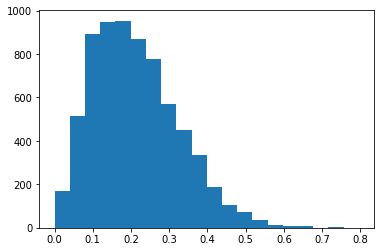

In [375]:
import matplotlib.pyplot as pyplot
pyplot.figure(12)
print(len(day_stats))
pyplot.hist([day[INTENSITY] for day in day_stats if math.exp(day[TOTAL_TIME])], bins=20)

In [460]:
import pandas as pd
INFREQ_TIME = "infreq_time"
data_frame_dict = { key: [] for key in day_stats[0] if "domain_time" not in key and "num_sessions" not in key and "intervention_sessions" not in key}
NUM_GOALS = "num_goals"
data_frame_dict[AVG_GOAL_TIME] = []
data_frame_dict[AVG_FREQ_TIME] = []
data_frame_dict[AVG_INFREQ_TIME] = []
data_frame_dict[NUM_GOALS] = []
data_frame_dict[INFREQ_TIME] = []
# Let's also count up the freq to see if they're roughly equal
field_stats = {}
print(len(day_stats))
for item in day_stats:
    if len(item[FREQ_GOALS]) > 0 and len(item[INFREQ_GOALS]):
        for key in item:
            #if key == 'install_id':
            #  continue
            #print(key)
            if key == INTENSITY: ## REUSING OLD DEFINITION OF INTENISTY    
                data_frame_dict[INTENSITY].append(len(item[FREQ_GOALS])/len(item[GOALS]))
            elif "domain_time" not in key and "num_sessions" not in key and "intervention_sessions" not in key:
                data_frame_dict[key].append((item[key]))
        data_frame_dict[AVG_GOAL_TIME].append(math.log(math.exp(item[GOAL_TIME])/len(item[GOALS])))
        data_frame_dict[AVG_FREQ_TIME].append(math.log(math.exp(item[FREQ_TIME])/len(item[FREQ_GOALS])))
        data_frame_dict[AVG_INFREQ_TIME].append(math.log((math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS])))
        data_frame_dict[INFREQ_TIME].append(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME])))
        data_frame_dict[NUM_GOALS].append(len(item[GOALS]))
df = pd.DataFrame(data_frame_dict)
print(df)


#mean([len(item[GOALS]) for item in day_stats])
df.to_csv('effect_freq_time_spent_2018_09_10.csv')

6918
      productive_time  unproductive_time  intensity  \
0            6.274762           9.042277   0.600000   
1            4.859812           8.122371   0.250000   
2            7.121252           7.741968   0.333333   
3            6.720220           8.000685   0.500000   
4            5.356586           6.150603   0.500000   
5            6.496775           9.277719   0.750000   
6            6.413459           8.809863   0.750000   
7            5.241747           8.592672   0.750000   
8            4.663439           9.302828   0.800000   
9            7.604894           9.117567   0.250000   
10           4.770685           9.080573   0.250000   
11           0.000000           9.124891   0.250000   
12           0.000000          10.020070   0.200000   
13           3.637586          10.736223   0.400000   
14           2.302585           9.099744   0.400000   
15           3.688879           9.049467   0.250000   
16           4.532599           9.002085   0.400000   
17   

In [461]:
%%R -i df -w 5 -h 5 --units in -r 200

#install.packages('ez')
#install.packages('lme4')

library(lme4)
library(sjPlot)
library(lmerTest)
#library(ez)


/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead

In [462]:
#for index, row in df.iterrows():
#  if row['total_time'] > 12:
#    print(row['email_hash'])

In [463]:
%%R -i df -w 5 -h 5 --units in -r 200

nrow(df)

/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead

[1] 4463


In [464]:
%%R -i df -w 5 -h 5 --units in -r 200

summary(df)

 productive_time  unproductive_time   intensity       infreq_goals      
 Min.   : 0.000   Min.   : 0.000    Min.   :0.08333   Length:4463       
 1st Qu.: 4.331   1st Qu.: 7.810    1st Qu.:0.33333   Class :character  
 Median : 6.209   Median : 8.733    Median :0.50000   Mode  :character  
 Mean   : 5.990   Mean   : 8.473    Mean   :0.50065                     
 3rd Qu.: 8.034   3rd Qu.: 9.469    3rd Qu.:0.66667                     
 Max.   :11.628   Max.   :11.436    Max.   :1.00000                     
  target_time        freq_time        total_time       goal_time     
 Min.   : 0.0000   Min.   : 0.000   Min.   : 5.609   Min.   : 3.135  
 1st Qu.: 0.0000   1st Qu.: 6.679   1st Qu.: 9.399   1st Qu.: 8.089  
 Median : 0.0000   Median : 7.791   Median : 9.991   Median : 8.777  
 Mean   : 0.9834   Mean   : 7.477   Mean   : 9.941   Mean   : 8.661  
 3rd Qu.: 0.0000   3rd Qu.: 8.590   3rd Qu.:10.642   3rd Qu.: 9.361  
 Max.   :10.4579   Max.   :11.001   Max.   :12.115   Max.   :11.353  

In [465]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: total_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 9425

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.0189 -0.4162  0.1356  0.5617  3.7175 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5980   0.7733  
 Residual               0.3652   0.6043  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 9.679e+00  4.611e-02 1.211e+03 209.927   <2e-16 ***
intensity   1.230e-01  5.670e-02 4.203e+03   2.168   0.0302 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.630


In [466]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
#results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
#summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
results <- lm(total_time ~ intensity, data = df)
summary(results)



Call:
lm(formula = total_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3072 -0.5442  0.0507  0.7045  2.1739 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.89251    0.03808 259.785   <2e-16 ***
intensity    0.09681    0.07114   1.361    0.174    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9003 on 4461 degrees of freedom
Multiple R-squared:  0.000415,	Adjusted R-squared:  0.0001909 
F-statistic: 1.852 on 1 and 4461 DF,  p-value: 0.1736



In [467]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 11428.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.5574 -0.4403  0.0975  0.5812  4.9987 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6095   0.7807  
 Residual               0.6005   0.7749  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 8.392e+00  5.254e-02 1.479e+03 159.720   <2e-16 ***
intensity   1.757e-01  7.195e-02 4.304e+03   2.441   0.0147 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.701


In [468]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-ALLGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 15067.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3522 -0.4800  0.1071  0.5826  3.3657 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6107   0.7815  
 Residual               1.4692   1.2121  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    6.0835     0.0696 2051.2165  87.408   <2e-16 ***
intensity      0.9887     0.1095 4453.5340   9.026   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.802


In [469]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-ALLGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 10815.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.5311 -0.4853  0.0834  0.5748  4.7486 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5805   0.7619  
 Residual               0.5184   0.7200  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 6.864e+00  4.992e-02 1.441e+03 137.483  < 2e-16 ***
intensity   2.983e-01  6.702e-02 4.286e+03   4.451 8.75e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.687


In [470]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-INFREQGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm(avg_infreq_time ~ intensity, data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)



Call:
lm(formula = avg_infreq_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1305 -0.6935  0.1250  0.8375  4.4589 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.50457    0.05536 135.566   <2e-16 ***
intensity   -0.93511    0.10342  -9.042   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.309 on 4461 degrees of freedom
Multiple R-squared:  0.018,	Adjusted R-squared:  0.01778 
F-statistic: 81.76 on 1 and 4461 DF,  p-value: < 2.2e-16



In [389]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-INFREQGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 14248.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8798 -0.4478  0.1143  0.5947  5.0590 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6952   0.8338  
 Residual               1.1891   1.0905  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    7.46476    0.06503 1442.92963  114.79   <2e-16 ***
intensity     -2.31746    0.21795 4217.88521  -10.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.758


In [390]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 14371.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7638 -0.4542  0.0748  0.5896  3.6607 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6073   0.7793  
 Residual               1.2407   1.1139  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 5.132e+00  6.416e-02 1.563e+03   79.99   <2e-16 ***
intensity   6.403e+00  2.198e-01 4.101e+03   29.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.775


In [391]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 10715.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4900 -0.4804  0.0787  0.5645  4.7248 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5709   0.7556  
 Residual               0.5068   0.7119  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 6.650e+00  4.913e-02 1.307e+03  135.36   <2e-16 ***
intensity   1.621e+00  1.480e-01 4.460e+03   10.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.681


In [392]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
#results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
#summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
results <- lm(goal_time ~ intensity, data = df)
summary(results)



Call:
lm(formula = goal_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1406 -0.5297  0.1166  0.6525  2.7534 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.06587    0.03614  223.18   <2e-16 ***
intensity    2.62830    0.14547   18.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9973 on 4461 degrees of freedom
Multiple R-squared:  0.06819,	Adjusted R-squared:  0.06798 
F-statistic: 326.5 on 1 and 4461 DF,  p-value: < 2.2e-16



In [393]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
#results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
#summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
results <- lm(avg_goal_time ~ intensity, data = df)
summary(results)



Call:
lm(formula = avg_goal_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1273 -0.5660  0.0510  0.6281  2.9208 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.7468     0.0353   191.1   <2e-16 ***
intensity     1.6206     0.1421    11.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9742 on 4461 degrees of freedom
Multiple R-squared:  0.02833,	Adjusted R-squared:  0.02812 
F-statistic: 130.1 on 1 and 4461 DF,  p-value: < 2.2e-16



In [394]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 11219

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4949 -0.4470  0.1050  0.5694  4.9423 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5595   0.7480  
 Residual               0.5755   0.7586  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 7.959e+00  5.053e-02 1.332e+03  157.52   <2e-16 ***
intensity   2.320e+00  1.565e-01 4.445e+03   14.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.700


In [395]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 14371.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7638 -0.4542  0.0748  0.5896  3.6607 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6073   0.7793  
 Residual               1.2407   1.1139  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 5.132e+00  6.416e-02 1.563e+03   79.99   <2e-16 ***
intensity   6.403e+00  2.198e-01 4.101e+03   29.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.775


In [396]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 14248.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8798 -0.4478  0.1143  0.5947  5.0590 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6952   0.8338  
 Residual               1.1891   1.0905  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    7.46476    0.06503 1442.92963  114.79   <2e-16 ***
intensity     -2.31746    0.21795 4217.88521  -10.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.758


In [397]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(unproductive_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: unproductive_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 13861.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.3725 -0.3882  0.0785  0.5199  5.1150 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.115    1.4543  
 Residual               0.955    0.9772  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 7.567e+00  9.267e-02 1.535e+03  81.651   <2e-16 ***
intensity   4.662e-01  2.114e-01 4.358e+03   2.205   0.0275 *  
num_goals   1.198e-01  1.073e-02 4.454e+03  11.162   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.433       
num_goals -0.480 -0.149


In [398]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ avg_freq_time + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ avg_freq_time + (1 | email_hash)
   Data: df

REML criterion at convergence: 14365.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.9498 -0.4404  0.1150  0.5950  4.8432 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6739   0.8209  
 Residual               1.2256   1.1071  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   6.932e+00  9.942e-02 3.664e+03  69.723   <2e-16 ***
avg_freq_time 1.685e-03  1.370e-02 4.450e+03   0.123    0.902    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
avg_freq_tm -0.906


In [399]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does total time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ intensity + (1|num_goals) + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: total_time ~ intensity + (1 | num_goals) + (1 | email_hash)
   Data: df

REML criterion at convergence: 9339.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.0300 -0.4400  0.1187  0.5769  3.5097 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.59231  0.7696  
 num_goals  (Intercept) 0.03936  0.1984  
 Residual               0.35482  0.5957  
Number of obs: 4463, groups:  email_hash, 548; num_goals, 19

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    9.7792     0.0728   27.7536 134.326  < 2e-16 ***
intensity      0.6611     0.1282 4420.4124   5.156 2.64e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.418


In [400]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 10742.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4043 -0.4720  0.0871  0.5736  4.8493 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5585   0.7473  
 Residual               0.5105   0.7145  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 7.249e+00  5.802e-02 1.881e+03  124.95   <2e-16 ***
intensity   1.789e+00  1.502e-01 4.459e+03   11.91   <2e-16 ***
num_goals   1.702e-01  7.509e-03 4.246e+03   22.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.488       
num_goals -0.537 -0.154


In [401]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 12046.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4300 -0.4470  0.0973  0.5512  3.2495 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.2231   1.1060  
 Residual               0.6465   0.8041  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    9.01379    0.07341 1672.63967 122.780   <2e-16 ***
intensity     -0.41198    0.17304 4396.94477  -2.381   0.0173 *  
num_goals      0.01799    0.00876 4459.37131   2.053   0.0401 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.446       
num_goals -0.495 -0.150


In [402]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(target_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: target_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 18055.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7216 -0.1661 -0.0551 -0.0118  5.0757 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.549    1.597   
 Residual               2.669    1.634   
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    0.7770     0.1084 1540.3850   7.170 1.16e-12 ***
intensity      0.5663     0.3368 4445.8367   1.682   0.0927 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.703


In [403]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(infreq_time ~ intensity + (1|email_hash) + num_goals, data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: infreq_time ~ intensity + (1 | email_hash) + num_goals
   Data: df

REML criterion at convergence: 15044.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.9072 -0.4536  0.1272  0.6179  4.0648 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.9134   0.9557  
 Residual               1.4065   1.1860  
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    7.42436    0.08748 1935.60665   84.87   <2e-16 ***
intensity     -3.93841    0.24184 4320.68645  -16.29   <2e-16 ***
num_goals      0.19071    0.01190 3586.32375   16.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.519       
num_goals -0.564 -0.160


735fc385e38dd2166db9fdabff905b4a985c5ebc496708618fe3548dbafd2f8e


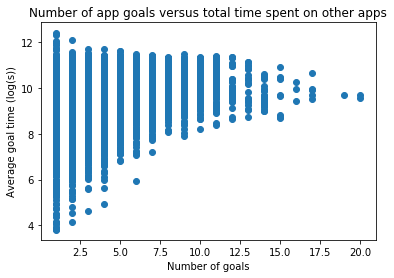

In [404]:
import matplotlib.pyplot as pyplot
import collections

most_active_users = {"": 0}
most_active_user = ""
for stat in day_stats:
    email = stat[HASH]
    if email not in most_active_users:
        most_active_users[email] = 0
    most_active_users[email] += 1
    if most_active_users[email] > most_active_users[most_active_user]:
        most_active_user = email
print(most_active_user)
pyplot.figure(43)
pyplot.title("Number of app goals versus total time spent on other apps")
pyplot.ylabel("Average goal time (log(s))")
pyplot.xlabel("Number of goals")
pyplot.scatter([len(stat[GOALS]) for stat in day_stats], [(stat[TOTAL_TIME]) for stat in day_stats])


In [405]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity +  (1|email_hash) + (1|num_goals), data = df)
summary(results)

/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: df

REML criterion at convergence: 12042.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.3937 -0.4528  0.1021  0.5463  3.2556 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.220554 1.1048  
 num_goals  (Intercept) 0.001211 0.0348  
 Residual               0.646494 0.8040  
Number of obs: 4463, groups:  email_hash, 548; num_goals, 19

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    9.09976    0.06523  216.23453 139.495   <2e-16 ***
intensity     -0.35530    0.17177 3456.85876  -2.068   0.0387 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.599


In [406]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(target_time ~ avg_goal_time + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: target_time ~ avg_goal_time + (1 | email_hash)
   Data: df

REML criterion at convergence: 17993.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6685 -0.2190 -0.0800  0.0552  5.2613 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.552    1.598   
 Residual               2.625    1.620   
Number of obs: 4463, groups:  email_hash, 548

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     -1.05712    0.24665 4174.24834  -4.286 1.86e-05 ***
avg_goal_time    0.27942    0.03337 4455.32674   8.372  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
avg_goal_tm -0.950


In [510]:
# see average change for time spent in goals vs. outside of goal when freq setting changes
goal_change_dict = {"frequency": [], "time": [], "other_time": [], "app": [], "user": []}
from statistics import mean, StatisticsError
goal_time_change_stats = []
other_time_change_stats = []
user_stats = {}
max_time = 0
for day in day_stats:
    email = day[HASH]
    if day[HASH] not in user_stats:
        user_stats[email] = {FREQ_GOALS: set([]), INFREQ_GOALS: set([])}
    user_stats[email][FREQ_GOALS] = user_stats[email][FREQ_GOALS].union(day[FREQ_GOALS])
    user_stats[email][INFREQ_GOALS] = user_stats[email][INFREQ_GOALS].union(day[INFREQ_GOALS])
    for domain_time in day:
        if "_domain_time" in domain_time:
            domain = domain_time[:-len("_domain_time")]
            if domain not in user_stats[email]:
                user_stats[email][domain] = {"frequent_goal": [], "infrequent_goal": [], "frequent_other": [], "infrequent_other": []}
            if not (domain in day[FREQ_GOALS] and domain in day[INFREQ_GOALS]) and day[GOAL_TIME] > day[domain_time]:
                freq = "frequent" if domain in day[FREQ_GOALS] else "infrequent"
                if day[domain_time] > max_time:
                    max_time = day[domain_time]
                    print(max_time)
                user_stats[email][domain][freq + "_goal"].append(math.exp(day[domain_time]))
                user_stats[email][domain][freq + "_other"].append((math.exp(day[GOAL_TIME]) - math.exp(day[domain_time])))
for user in user_stats:
    for domain in user_stats[user][FREQ_GOALS].intersection(user_stats[user][INFREQ_GOALS]):
        if len(user_stats[user][domain]["frequent_goal"])> 0 and len(user_stats[user][domain]["infrequent_goal"]) > 0:
            try:
                mean_freq_goal = mean(user_stats[user][domain]["frequent_goal"])
                # print("frequent" + str(user_stats[user][domain]["frequent_goal"]))
                # print("infrequent  " + str(user_stats[user][domain]["infrequent_goal"]))
                goal_change = mean_freq_goal - mean(user_stats[user][domain]["infrequent_goal"])
                other_change = mean(user_stats[user][domain]["frequent_other"]) - mean(user_stats[user][domain]["infrequent_other"])
                goal_time_change_stats.append(goal_change)
                other_time_change_stats.append(other_change)
            except StatisticsError:
                pass

3.4965075614664802
9.009202900924588
9.914625296946584
10.663124474364906
11.05668271897453
11.340082840810044


1328
0.49096385542168675
[-123.84276374312621, -31.11877927683696]


<BarContainer object of 2 artists>

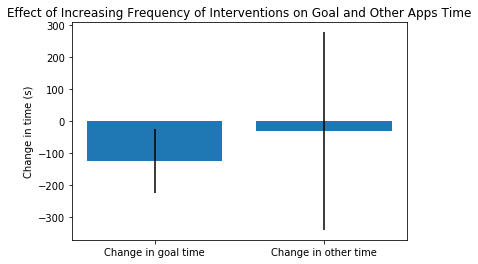

In [511]:
from scipy.stats import sem
pyplot.figure(32)
print(len(goal_time_change_stats))
pyplot.title("Effect of Increasing Frequency of Interventions on Goal and Other Apps Time")
pyplot.ylabel('Change in time (s)')
print(len([stat for stat in other_time_change_stats if stat > 0])/len(goal_time_change_stats))
print([mean(goal_time_change_stats), mean(other_time_change_stats)])
pyplot.bar(["Change in goal time", "Change in other time"], [mean(goal_time_change_stats), mean(other_time_change_stats)] , .8, yerr=[1.96 * sem(goal_time_change_stats), 1.96 * sem(other_time_change_stats)])



In [499]:

import pandas as pd
# our next data set: goal_time, freq, goal, and email_hash
goal_stats_dict = {"app": [], "email": [], "time": [], "other_time": [], "frequency": [], 'intensity_day': [], 'intensity_othergoals_day': [], "other_goal_time":[], "avg_other_goal_time": []}
for day in day_stats:
    for key in day:
        if "domain_time" in key:
            domain = key[:-len("_domain_time")]
            if not (domain in day[FREQ_GOALS] and domain in day[INFREQ_GOALS]) and (domain in day[FREQ_GOALS] or domain in day[INFREQ_GOALS]):
                freq = "frequent" if domain in day[FREQ_GOALS] else "infrequent"
                if math.exp(day[GOAL_TIME]) - math.exp(day[key]) != 0:
                    goal_stats_dict["intensity_othergoals_day"].append(day[INTENSITY] - day[domain + "_intervention_sessions"]/day["num_sessions"])

                    goal_stats_dict["other_goal_time"].append(math.log(math.exp(day[GOAL_TIME]) - math.exp(day[key])))
                    goal_stats_dict["avg_other_goal_time"].append(math.log(math.exp(goal_stats_dict["other_goal_time"][-1])/len(day[GOALS])))
                    goal_stats_dict["intensity_day"].append(day[INTENSITY])
                    goal_stats_dict["app"].append(domain)
                    goal_stats_dict["email"].append(day[HASH])
                    goal_stats_dict["time"].append(day[key])
                    goal_stats_dict["other_time"].append(math.log(math.exp(day[GOAL_TIME]) - math.exp(day[key])))
                    goal_stats_dict["frequency"].append(freq)
goal_freq_df = pd.DataFrame(goal_stats_dict)
print(goal_freq_df)
#goal_freq_df.to_csv("goal_freq_df.csv")

                                           app  \
0                           com.android.chrome   
1                        com.google.android.gm   
2                            com.mattermost.rn   
3                         com.linkedin.android   
4                          com.twitter.android   
5                         com.linkedin.android   
6                          com.twitter.android   
7                        com.instagram.android   
8                          com.twitter.android   
9                          com.facebook.katana   
10                        com.linkedin.android   
11                        com.linkedin.android   
12                         com.twitter.android   
13                         com.twitter.android   
14                        com.linkedin.android   
15                       com.instagram.android   
16                        com.linkedin.android   
17                         com.twitter.android   
18                        com.linkedin.android   


In [541]:
goal_freq_df.to_csv("2018-09-13-goal_freq_df.csv")

In [489]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-SYMBIOTIC

goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = goal_freq_df)
results <- lmer(time ~ other_goal_time + (frequency) + (1|app), data = goal_freq_df)
summary(results)


/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ other_goal_time + (frequency) + (1 | app)
   Data: goal_freq_df

REML criterion at convergence: 87853.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7715 -0.5615  0.1083  0.6577  3.5234 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 1.638    1.280   
 Residual             2.501    1.582   
Number of obs: 23152, groups:  app, 575

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.051e+00  9.597e-02  2.149e+03   52.64   <2e-16 ***
other_goal_time    1.044e-01  8.242e-03  2.304e+04   12.67   <2e-16 ***
frequencyfrequent -5.011e-01  2.151e-02  2.299e+04  -23.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) othr__
other_gl_tm -0.728       
frqncyfrqnt -0.146  0.017


In [548]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# DREW GOOD RESULT goodresult RESULT-MOBILE-SYMBIOTIC

goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = goal_freq_df)
results <- lmer(other_goal_time ~ frequency + (1|app), data = goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_goal_time ~ frequency + (1 | app)
   Data: goal_freq_df

REML criterion at convergence: 77294.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.6944 -0.4365  0.1633  0.6376  2.7339 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 0.4393   0.6628  
 Residual             1.6066   1.2675  
Number of obs: 23152, groups:  app, 575

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        8.480e+00  3.940e-02  4.899e+02 215.220   <2e-16 ***
frequencyfrequent -4.423e-02  1.717e-02  2.313e+04  -2.576     0.01 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.259


In [443]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

goal_freq_df <- subset(goal_freq_df, intensity_othergoals_day != -1)
summary(goal_freq_df)

     app               email                time          other_time    
 Length:23152       Length:23152       Min.   : 0.000   Min.   : 0.000  
 Class :character   Class :character   1st Qu.: 5.263   1st Qu.: 7.781  
 Mode  :character   Mode  :character   Median : 6.609   Median : 8.583  
                                       Mean   : 6.375   Mean   : 8.350  
                                       3rd Qu.: 7.664   3rd Qu.: 9.204  
                                       Max.   :11.340   Max.   :11.352  
  frequency         intensity_day      intensity_othergoals_day
 Length:23152       Min.   :0.007634   Min.   :0.0000          
 Class :character   1st Qu.:0.157350   1st Qu.:0.1233          
 Mode  :character   Median :0.227501   Median :0.1891          
                    Mean   :0.238473   Mean   :0.2021          
                    3rd Qu.:0.309091   3rd Qu.:0.2678          
                    Max.   :0.796296   Max.   :0.7037          
 other_goal_time 
 Min.   : 0.000  
 1st 

In [509]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-SYMBIOTIC

goal_freq_df <- subset(goal_freq_df, intensity_othergoals_day != -1)

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = goal_freq_df)
results <- lmer(time ~ intensity_othergoals_day + (frequency) + (1|app), data = goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|app) + (1|email), data = goal_freq_df)
summary(results)

/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ intensity_othergoals_day + (frequency) + (1 | app)
   Data: goal_freq_df

REML criterion at convergence: 87670.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8216 -0.5533  0.1083  0.6548  3.4037 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 1.580    1.257   
 Residual             2.483    1.576   
Number of obs: 23152, groups:  app, 575

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)               6.349e+00  6.859e-02  6.125e+02   92.56   <2e-16 ***
intensity_othergoals_day -1.963e+00  1.064e-01  2.312e+04  -18.44   <2e-16 ***
frequencyfrequent        -4.901e-01  2.145e-02  2.299e+04  -22.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) intn__
intnsty_th_ -0.324       
frqncyfrqnt -0.173 -0.04

In [ ]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
goal_freq_df$frequency <- goal_freq_df$frequency == 'frequent'
results <- t.test(goal_freq_df$time ~ goal_freq_df$frequency)
show(results)

In [ ]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lm(time ~ frequency, data = goal_freq_df)
summary(results)

In [444]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|app) , data = goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | app)
   Data: goal_freq_df

REML criterion at convergence: 88005.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7037 -0.5560  0.1104  0.6596  3.5078 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 1.595    1.263   
 Residual             2.520    1.587   
Number of obs: 23152, groups:  app, 575

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.940e+00  6.524e-02  4.981e+02   91.05   <2e-16 ***
frequencyfrequent -5.060e-01  2.159e-02  2.300e+04  -23.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.197


In [ ]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|app) + (1|email) , data = goal_freq_df)
summary(results)

In [445]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(other_time ~ frequency + (1|app) + (1|email), data = goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_time ~ frequency + (1 | app) + (1 | email)
   Data: goal_freq_df

REML criterion at convergence: 67748.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.2638 -0.3890  0.1350  0.5646  4.3342 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 0.1205   0.3472  
 email    (Intercept) 1.2221   1.1055  
 Residual             0.9894   0.9947  
Number of obs: 23152, groups:  app, 575; email, 575

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       7.952e+00  5.390e-02 7.394e+02 147.535   <2e-16 ***
frequencyfrequent 1.115e-02  1.410e-02 2.264e+04   0.791    0.429    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.152


In [ ]:

freq_time = [0,0]
infreq_time = [0,0]
other_time = [0,0]
num_days = [0, 0]
for day in day_stats:
    if len(day[FREQ_GOALS]) > 0 and len(day[INFREQ_GOALS]) > 0:
        intensity= len(day[FREQ_GOALS])/len(day[INFREQ_GOALS])
        if intensity <.5:
            num_days[0] += 1
            freq_time[0] += math.exp(day[FREQ_TIME])
            infreq_time[0] += math.exp(day[GOAL_TIME])-math.exp(day[FREQ_TIME])
            other_time[0] += math.exp(day[OTHER_TIME])
        elif intensity > .5:
            num_days[1] += 1
            freq_time[1] += math.exp(day[FREQ_TIME])
            infreq_time[1] += math.exp(day[GOAL_TIME])-math.exp(day[FREQ_TIME])
            other_time[1] += math.exp(day[OTHER_TIME])   
from functools import reduce
import numpy as np
for i in range(0,2):
    pyplot.figure(325 + i * 2 - 1)
    labels = 'Freq Time', 'Infreq Time', 'Other Time'
    sizes = [freq_time[i], infreq_time[i], other_time[i]]
    explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    pyplot.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")
    pyplot.figure(325 + i * 2)
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")
    pyplot.xlabel("App Category")
    pyplot.ylabel("Arithmetic Average Time Spent Per Day (s)")
    pyplot.bar(labels, list(map(lambda x: x/num_days[i], sizes)))
    pyplot.figure("Distribution of Time with Intensity")


In [ ]:
intensities = []
avg_freq_time = []
avg_infreq_time = []
ratio = []
for item in day_stats:
    if len(item[FREQ_GOALS]) > 0 and len(item[INFREQ_GOALS]) > 0 and math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]) > 3:
        avg_freq_time_pt = item[FREQ_TIME]/len(item[FREQ_GOALS])
        
        avg_infreq_time_pt = math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS])
        if avg_freq_time_pt/avg_infreq_time_pt > 1000:
            print(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))
            print(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME])))
            print(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS]))
            print(str(avg_freq_time_pt) + " " + str(avg_infreq_time_pt))
        intensity = len(item[FREQ_GOALS])/(len(item[FREQ_GOALS].union(item[INFREQ_GOALS])))
        if avg_freq_time_pt > 0 and avg_infreq_time_pt > 0:
            intensities.append(intensity)
            avg_freq_time.append(avg_freq_time_pt)
            avg_infreq_time.append(avg_infreq_time_pt)
            ratio.append((avg_freq_time_pt/avg_infreq_time_pt))
pyplot.figure(62426)
pyplot.title("Ratio of Average Frequent Goal Time to Average Infrequent Goal Time vs Intensity")
pyplot.xlabel("Intensity (fraction of frequent goals)")
pyplot.ylabel("Ratio")
pyplot.scatter(intensities, ratio)
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(intensities,ratio)
print(r_value)

In [290]:
user_to_install = json.loads(req.urlopen("http://localhost:5001/get_user_to_all_install_ids?user").read().decode("utf-8"))

In [ ]:
print(user_to_install)

In [291]:
# Get all browser user ids that have goal frequencies collection.
print ("getting collection names")
collection_names = ext_db.list_collection_names()
print("got collection names")
browser_user_ids = []
counter = 0
for name in collection_names:
    if counter % 100000 == 0:
        print(counter)
    counter += 1
    if "goal_frequencies" in name:
        user = name[:-len("_synced:goal_frequencies")]
        if user in user_to_install and len(user_to_install[user]) == 1:
            browser_user_ids.append(user)

getting collection names
got collection names
0
100000
200000


In [502]:
print(browser_user_ids[:10])

['c8d66c0d7b3573ad940047e7', '883c1ba5c4e5472d2f8067d6', 'd49e6ce9c7fadc10f3baf7bd', '601ef212e501d1cdccebf63b', '9e63d7e9d250c795b9c657e8', 'ca55f0a0e2e0765089529619', '70f7e2720c2ff541f5f6d774', '9aa2418cff3facda9bb90c15', 'a09f4d8b6326097b44238b62', '126dcab7446cd026ebd53a10']


In [508]:
from browser_libs import get_session_info_list_for_user

ValueError: attempted relative import beyond top-level package

In [321]:
browser_days = []
import moment
import math
from time_utils import epoch_to_date
from datetime import datetime
import time
# Now the browser side of things!!
num_browser_users = len(browser_user_ids)
counter = 0
for user in browser_user_ids:
    # Get freq settings:
    counter += 1
    if int((counter + 1)/num_browser_users * 100) > int(counter/num_browser_users * 100):
        print(str(counter/num_browser_users * 100) + "%")
    user_stats = get_freq_stats(user)
    if len(user_stats) == 0:
        continue
    browser_day_map = {}
    for day_stat in ext_db[user+ "_synced:seconds_on_domain_per_day"].find({"key2":{"$gt": 930}}):
        # The key1 serves as a day. However, if we are going to compare same day stuffs for android.
        # We need to instead build day string from moment
        day = epoch_to_date(int(day_stat['key2']))
        if day not in browser_day_map:
            browser_day_map[day] = {"num_sessions": set([]), "intervention_sessions": set([])}
        goal = get_name(day_stat['key'], BROWSER_DOMAIN)
        if goal:
            if goal + "_domain_time" not in browser_day_map or day_stat["val"] > browser_day_map[day][goal + "_domain_time"]:
                browser_day_map[day][goal + "_domain_time"] = day_stat["val"]
    for intervention_stat in ext_db[user + "_synced:seconds_on_domain_per_session"].find():
        moment_obj = moment.unix(intervention_stat["timestamp_local"])
        date = moment_obj.format("YYYY-MM-DD")
        if date in browser_day_map:
            browser_day_map[date]["num_sessions"].add(intervention_stat["key"] +" " + str(intervention_stat["key2"]))
    
    for intervention_stat in ext_db[user + "_synced:interventions_active_for_domain_and_session"].find():
        if "is_preview_mode" not in intervention_stat or not intervention_stat["is_preview_mode"]:
            moment_obj = moment.unix(intervention_stat["timestamp_local"])
            date = moment_obj.format("YYYY-MM-DD")
            if date in browser_day_map and len(intervention_stat["val"]) > 0:
                browser_day_map[date]["intervention_sessions"].add(intervention_stat["key"] +" " + str(intervention_stat["key2"]))
            
    for day in browser_day_map:
        day_data = { FREQ_TIME: 0, INFREQ_TIME: 0, INTENSITY: 0, INFREQ_GOALS: set([]),  TOTAL_TIME: 0, GOAL_TIME: 0, HASH:user, GOALS: set([]), FREQ_GOALS: set([]), OTHER_TIME: 0, GOAL_TIMES: []}
        # weirdly enough, datetime timestamps are seconds, not ms.
        isoWeek = str(datetime.fromtimestamp(moment.date(day).epoch() + 8 * (60 ** 2)).isocalendar()[1])
        # Add obj and reset data
        # take logs of time cuz time is log-norm distributed
        # First, count up all domain_times into TOTAL, GOAL, and OTHER
        if isoWeek not in user_stats:
            continue
        day_data[FREQ_GOALS] = user_stats[isoWeek][FREQ_GOALS]
        day_data[INFREQ_GOALS] = user_stats[isoWeek][INFREQ_GOALS]
        day_data[GOALS] = day_data[FREQ_GOALS].union(day_data[INFREQ_GOALS])
        if len(user_stats[isoWeek][FREQ_GOALS].intersection(user_stats[isoWeek][INFREQ_GOALS])) > 0:
            continue
        for key in browser_day_map[day]:
            if "_domain_time" in key:
                key_goal = key[:-len("_domain_time")]
                day_data[TOTAL_TIME] += int(browser_day_map[day][key])
                if key_goal in day_data[FREQ_GOALS] or key_goal in day_data[INFREQ_GOALS]:
                    frequent = "frequent" if key_goal in day_data[FREQ_GOALS] else "infrequent"
                    if key_goal in day_data[FREQ_GOALS]:
                        day_data[FREQ_TIME] += browser_day_map[day][key]
                    else:
                        day_data[INFREQ_TIME] += browser_day_map[day][key]
                    day_data[GOAL_TIMES].append({"frequency": frequent, "goal": key_goal, "time": browser_day_map[day][key]})
                    day_data[GOAL_TIME] += browser_day_map[day][key]
                else:
                    day_data[OTHER_TIME] += browser_day_map[day][key]
        for key in day_data:
            if "time" in key and day_data[key] > 0:
                day_data[key]= math.log(day_data[key])
        if len(day_data[FREQ_GOALS]) > 0 and len(day_data[INFREQ_GOALS]) > 0:
            day_data[AVG_FREQ_TIME] = math.log(math.exp(day_data[FREQ_TIME])/len(day_data[FREQ_GOALS]))
            day_data[AVG_INFREQ_TIME] = day_data[INFREQ_TIME]/len(day_data[INFREQ_GOALS])
            for goal_time in day_data[GOAL_TIMES]:
                    if goal_time[TIME] > 0:
                        goal_time[TIME] = math.log(goal_time[TIME])
            if len(day_data[FREQ_GOALS])+ len(day_data[INFREQ_GOALS]) > 0:
                if len(browser_day_map[day]["num_sessions"]) > 0:
                    if len(browser_day_map[day]["num_sessions"]) < len(browser_day_map[day]["intervention_sessions"]):
                        print(user)
                        print(browser_day_map[day]["num_sessions"])
                        print((browser_day_map[day]["intervention_sessions"]))
                        print("")
                    browser_day_map[day]["intervention_sessions"] = browser_day_map[day]["intervention_sessions"].intersection(browser_day_map[day]["num_sessions"])
                    day_data[INTENSITY] = len(browser_day_map[day]["intervention_sessions"])/len(browser_day_map[day]["num_sessions"])
                    browser_days.append(day_data)
                else:
                    #print(day + " " + str(browser_day_map[day]))
                    #print([b for b in ext_db[user + "_logs:goals"].find()][-1]["enabled_goals"])
                    #print("after")
                    pass



0.9307135470527405%
1.9648397104446742%
2.998965873836608%
3.9296794208893484%
4.963805584281282%
5.997931747673216%
6.928645294725956%
7.96277145811789%
8.996897621509824%
9.927611168562564%
10.961737331954497%
11.995863495346432%
1427c75a5da0d8e5c0baf9e4
{'www.wikiwand.com 192', 'www.google.com 824', 'www.manhattanprep.com 6', 'www.youtube.com 643', 'www.google.com 826', 'translate.google.com 20', 'mail.google.com 58', 'mentalfloss.com 0', 'translate.google.com 21', 'www.google.com 822', 'www.google.com 823', 'rj.olx.com.br 6', 'www.youtube.com 629', 'www.youtube.com 640', 'www.youtube.com 642', 'www.wikiwand.com 190', 'www.youtube.com 637', 'www.google.com 827', 'www.youtube.com 641'}
{'www.youtube.com 639', 'www.youtube.com 632', 'www.youtube.com 634', 'www.youtube.com 647', 'www.youtube.com 646', 'www.youtube.com 649', 'www.youtube.com 640', 'www.youtube.com 644', 'www.youtube.com 651', 'www.youtube.com 630', 'www.youtube.com 635', 'www.youtube.com 636', 'www.youtube.com 637', 'ww

In [516]:
import pandas as pd
# Dataframe to find effect of frequency on goal times
browser_goal_freq_dict = {HASH: [], TIME: [], GOAL: [], FREQUENCY: [], 'intensity_othergoals_day': [], 'other_goal_time': [], 'avg_other_goal_time': []}
for day in browser_days:
    total_num_goals = len(day[GOAL_TIMES])
    total_num_othergoals = total_num_goals - 1
    total_num_freq_goals = 0
    for goal_time in day[GOAL_TIMES]:
        if goal_time[FREQUENCY] == 'frequent':
            total_num_freq_goals += 1
    for goal_time in day[GOAL_TIMES]:
        if (math.exp(day[GOAL_TIME]) - math.exp(goal_time[TIME])) != 0:
            browser_goal_freq_dict[HASH].append(day[HASH])
            browser_goal_freq_dict[FREQUENCY].append(goal_time[FREQUENCY])
            browser_goal_freq_dict[TIME].append(goal_time[TIME])
            browser_goal_freq_dict[GOAL].append(goal_time[GOAL])
            browser_goal_freq_dict['other_goal_time'].append(math.log(math.exp(day[TOTAL_TIME]) - math.exp(goal_time[TIME])))
            browser_goal_freq_dict['avg_other_goal_time'].append(math.log((math.exp(browser_goal_freq_dict['other_goal_time'][-1])/(len(day[GOALS])- 1))))
            total_num_freq_othergoals = total_num_freq_goals
            if goal_time[FREQUENCY] == 'frequent':
                total_num_freq_othergoals -= 1
            if total_num_othergoals > 0:
                intensity_othergoals = total_num_freq_othergoals / total_num_othergoals
            else:
                intensity_othergoals = -1
            browser_goal_freq_dict['intensity_othergoals_day'].append(intensity_othergoals)

browser_goal_freq_df = pd.DataFrame(browser_goal_freq_dict)
print(browser_goal_freq_df)
browser_goal_freq_df.to_csv("2018-09-10-browser_goal_freq_df.csv")

                     email_hash      time       goal   frequency  \
0      601ef212e501d1cdccebf63b  7.918992   facebook  infrequent   
1      601ef212e501d1cdccebf63b  7.379632    twitter    frequent   
2      601ef212e501d1cdccebf63b  5.971262     amazon  infrequent   
3      601ef212e501d1cdccebf63b  8.535033   facebook  infrequent   
4      601ef212e501d1cdccebf63b  7.591357    twitter    frequent   
5      9e63d7e9d250c795b9c657e8  3.761200    twitter  infrequent   
6      9e63d7e9d250c795b9c657e8  5.697093   facebook  infrequent   
7      9e63d7e9d250c795b9c657e8  6.744059     reddit    frequent   
8      9e63d7e9d250c795b9c657e8  7.817625    youtube    frequent   
9      9e63d7e9d250c795b9c657e8  6.028279   facebook  infrequent   
10     9e63d7e9d250c795b9c657e8  7.506042     reddit    frequent   
11     9e63d7e9d250c795b9c657e8  5.587249   facebook  infrequent   
12     9e63d7e9d250c795b9c657e8  7.025538     reddit    frequent   
13     9e63d7e9d250c795b9c657e8  6.222576    you

In [540]:
browser_goal_freq_df.to_csv("2018-09-13-browser_goal_freq_df.csv")

In [304]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

library(lme4)
library(sjPlot)
library(lmerTest)

/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [517]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

#browser_goal_freq_df <- subset(browser_goal_freq_df, intensity_othergoals_day != -1)

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash, ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube' | goal == 'facebook')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lm(other_goal_time ~  (frequency) , data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|goal), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)



Call:
lm(formula = other_goal_time ~ (frequency), data = browser_goal_freq_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1726 -0.4711  0.1634  0.6187  2.4564 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.74372    0.01261 693.303   <2e-16 ***
frequencyfrequent  0.03833    0.01785   2.148   0.0318 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9271 on 10791 degrees of freedom
Multiple R-squared:  0.0004272,	Adjusted R-squared:  0.0003346 
F-statistic: 4.612 on 1 and 10791 DF,  p-value: 0.03177



In [518]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

#browser_goal_freq_df <- subset(browser_goal_freq_df, intensity_othergoals_day != -1)

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube' | goal == 'facebook')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ (frequency) + (1|goal) + (1|email_hash), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|goal), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ (frequency) + (1 | goal) + (1 | email_hash)
   Data: browser_goal_freq_df

REML criterion at convergence: 41098.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6488 -0.4985  0.1456  0.6589  3.0666 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5161   0.7184  
 goal       (Intercept) 0.6559   0.8099  
 Residual               2.3730   1.5405  
Number of obs: 10793, groups:  email_hash, 605; goal, 332

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.442e+00  7.237e-02  4.364e+02  75.203   <2e-16 ***
frequencyfrequent -8.040e-02  3.164e-02  1.053e+04  -2.541   0.0111 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.225


In [539]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200
## DREW GOOD RESULT BROWSER CONSERVATION
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube' | goal == 'facebook')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(other_goal_time ~ frequency  + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_goal_time ~ frequency + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 28883

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.0524 -0.4852  0.1651  0.6628  2.6936 

Random effects:
 Groups   Name        Variance Std.Dev.
 goal     (Intercept) 0.09795  0.3130  
 Residual             0.83192  0.9121  
Number of obs: 10793, groups:  goal, 332

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       8.766e+00  2.833e-02 1.757e+02  309.42   <2e-16 ***
frequencyfrequent 3.305e-02  1.797e-02 1.068e+04    1.84   0.0659 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.325


In [520]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | email_hash)
   Data: browser_goal_freq_df

REML criterion at convergence: 41800.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4245 -0.5372  0.1427  0.6700  3.0570 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5633   0.7505  
 Residual               2.6122   1.6162  
Number of obs: 10793, groups:  email_hash, 605

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.863e+00  4.051e-02  6.975e+02  144.74   <2e-16 ***
frequencyfrequent -5.627e-02  3.216e-02  1.051e+04   -1.75   0.0801 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.394


In [308]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
#browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'facebook')
#browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | email_hash)
   Data: browser_goal_freq_df

REML criterion at convergence: 10417.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5926 -0.4748  0.1512  0.5946  3.0919 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.379    1.174   
 Residual               1.666    1.291   
Number of obs: 2866, groups:  email_hash, 547

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)          5.67690    0.06646  681.73428  85.418   <2e-16 ***
frequencyfrequent   -0.05552    0.06586 2857.27487  -0.843    0.399    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.469


In [521]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | email_hash) + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 41098.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6488 -0.4985  0.1456  0.6589  3.0666 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5161   0.7184  
 goal       (Intercept) 0.6559   0.8099  
 Residual               2.3730   1.5405  
Number of obs: 10793, groups:  email_hash, 605; goal, 332

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.442e+00  7.237e-02  4.364e+02  75.203   <2e-16 ***
frequencyfrequent -8.040e-02  3.164e-02  1.053e+04  -2.541   0.0111 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.225


In [310]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- browser_goal_freq_df$frequency == 'frequent'
results <- t.test(browser_goal_freq_df$time ~ browser_goal_freq_df$frequency)
show(results)
#summary(browser_goal_freq_df)


	Welch Two Sample t-test

data:  browser_goal_freq_df$time by browser_goal_freq_df$frequency
t = 2.6241, df = 11850, p-value = 0.008698
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02174441 0.15013366
sample estimates:
mean in group FALSE  mean in group TRUE 
           5.877076            5.791137 



In [311]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lm(time ~ frequency, data = browser_goal_freq_df)
summary(results)


Call:
lm(formula = time ~ frequency, data = browser_goal_freq_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8771 -1.0408  0.1978  1.2614  5.2933 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.87708    0.02312 254.220   <2e-16 ***
frequencyfrequent -0.08594    0.03275  -2.624   0.0087 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.783 on 11852 degrees of freedom
Multiple R-squared:  0.0005806,	Adjusted R-squared:  0.0004963 
F-statistic: 6.885 on 1 and 11852 DF,  p-value: 0.008703



In [312]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 46386

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8308 -0.5430  0.1438  0.6922  2.8103 

Random effects:
 Groups   Name        Variance Std.Dev.
 goal     (Intercept) 0.8243   0.9079  
 Residual             2.8336   1.6833  
Number of obs: 11854, groups:  goal, 337

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.382e+00  6.633e-02  3.074e+02  81.136  < 2e-16 ***
frequencyfrequent -9.474e-02  3.186e-02  1.185e+04  -2.974  0.00295 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.243


In [313]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | email_hash) + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 45432.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6583 -0.5073  0.1464  0.6624  2.9446 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5860   0.7655  
 goal       (Intercept) 0.6703   0.8187  
 Residual               2.4251   1.5573  
Number of obs: 11854, groups:  email_hash, 696; goal, 337

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.406e+00  7.219e-02  4.488e+02  74.887  < 2e-16 ***
frequencyfrequent -7.962e-02  3.067e-02  1.161e+04  -2.596  0.00945 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.217


In [314]:
#print(time)

In [315]:
FREQ_FRAC_TIME = "freq_frac_time"
INFREQ_FRAC_TIME = "infreq_frac_time"
AVG_GOAL_TIME= "avg_goal_time"
intensity_dict ={INTENSITY: [], HASH: [], TOTAL_TIME: [], GOAL_TIME: [], OTHER_TIME: [], AVG_GOAL_TIME: [],
                AVG_FREQ_TIME: [], FREQ_FRAC_TIME: [], INFREQ_FRAC_TIME: [], AVG_INFREQ_TIME: [], NUM_FREQ_GOALS: [], NUM_INFREQ_GOALS: [], NUM_GOALS: []}
for day in browser_days:
    for key in intensity_dict:
        if key not in [AVG_GOAL_TIME, NUM_FREQ_GOALS, NUM_INFREQ_GOALS, NUM_GOALS, FREQ_FRAC_TIME, INFREQ_FRAC_TIME]:
            intensity_dict[key].append(day[key])
    intensity_dict[NUM_FREQ_GOALS].append(len(day[FREQ_GOALS]))
    intensity_dict[NUM_INFREQ_GOALS].append(len(day[INFREQ_GOALS]))
    intensity_dict[AVG_GOAL_TIME].append(math.log(math.exp(day[GOAL_TIME])/len(day[GOALS])))
    intensity_dict[NUM_GOALS].append(len(day[FREQ_GOALS].union(day[INFREQ_GOALS])))
    intensity_dict[FREQ_FRAC_TIME].append(math.exp(day[FREQ_TIME])/math.exp(day[TOTAL_TIME]))
    intensity_dict[INFREQ_FRAC_TIME].append(math.exp(day[INFREQ_TIME])/math.exp(day[TOTAL_TIME]))
browser_df = pd.DataFrame(intensity_dict)
browser_df.to_csv("2018-09-10-browser_intensity_on_time.csv")
print(browser_df)

      intensity                email_hash  total_time  goal_time  other_time  \
0      0.192308  883c1ba5c4e5472d2f8067d6    7.105786   6.188264    6.595781   
1      0.200000  d49e6ce9c7fadc10f3baf7bd    6.788972   0.000000    6.788972   
2      0.000000  d49e6ce9c7fadc10f3baf7bd    5.192957   0.000000    5.192957   
3      0.159664  d49e6ce9c7fadc10f3baf7bd    6.942157   5.609472    6.635947   
4      0.085366  601ef212e501d1cdccebf63b    9.316950   8.464636    8.761080   
5      0.084112  601ef212e501d1cdccebf63b    9.791606   8.863757    9.288412   
6      0.269841  9e63d7e9d250c795b9c657e8    8.311398   7.081709    7.965546   
7      0.373494  9e63d7e9d250c795b9c657e8    9.235521   8.459140    8.619208   
8      0.421053  9e63d7e9d250c795b9c657e8    8.434029   7.547502    7.902857   
9      0.000000  9e63d7e9d250c795b9c657e8    4.844187   0.000000    4.844187   
10     0.241935  9aa2418cff3facda9bb90c15    8.927447   7.640604    8.604288   
11     0.265306  9aa2418cff3facda9bb90c1

In [316]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash) + (1|num_goals), data = browser_df)
summary(results)

/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: browser_df

REML criterion at convergence: 21738.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2577 -0.3424  0.1818  0.5299  2.7508 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.78358  1.6684  
 num_goals  (Intercept) 0.05867  0.2422  
 Residual               3.56141  1.8872  
Number of obs: 4997, groups:  email_hash, 707; num_goals, 15

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    5.9347     0.1226    9.8648   48.41 4.65e-13 ***
intensity      2.5610     0.1952 4959.7311   13.12  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.309


In [319]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-FREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_freq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_freq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0760 -2.4508 -0.4953  1.3323  8.5642 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.45079    0.05049  48.539  < 2e-16 ***
intensity    1.62526    0.19736   8.235 2.27e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.477 on 4995 degrees of freedom
Multiple R-squared:  0.01339,	Adjusted R-squared:  0.0132 
F-statistic: 67.81 on 1 and 4995 DF,  p-value: 2.272e-16



In [318]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-FREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 21496.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5534 -0.5227 -0.0365  0.4808  4.0497 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.229    1.797   
 Residual               3.314    1.821   
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.669e+00  8.261e-02 9.135e+02  32.307  < 2e-16 ***
intensity   1.086e+00  1.898e-01 4.945e+03   5.722 1.11e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.417


In [320]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-INFREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_infreq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_infreq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9595 -2.5076 -0.4368  1.2150  8.0462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.50759    0.04963  50.524  < 2e-16 ***
intensity    1.45187    0.19400   7.484 8.48e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.435 on 4995 degrees of freedom
Multiple R-squared:  0.01109,	Adjusted R-squared:  0.01089 
F-statistic: 56.01 on 1 and 4995 DF,  p-value: 8.476e-14



In [334]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-INFREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 21089

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3206 -0.5055 -0.0257  0.4662  3.9951 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.440    1.855   
 Residual               2.997    1.731   
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.717e+00  8.331e-02 8.784e+02  32.615  < 2e-16 ***
intensity   9.271e-01  1.817e-01 4.904e+03   5.103 3.48e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.396


In [335]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

summary(browser_df)

   intensity        email_hash          total_time       goal_time     
 Min.   :0.00000   Length:4997        Min.   : 0.000   Min.   : 0.000  
 1st Qu.:0.05587   Class :character   1st Qu.: 7.975   1st Qu.: 5.645  
 Median :0.14286   Mode  :character   Median : 8.763   Median : 7.193  
 Mean   :0.18417                      Mean   : 8.494   Mean   : 6.412  
 3rd Qu.:0.25641                      3rd Qu.: 9.324   3rd Qu.: 8.124  
 Max.   :1.00000                      Max.   :11.210   Max.   :11.191  
   other_time     avg_goal_time    avg_freq_time    freq_frac_time     
 Min.   : 0.000   Min.   :-2.890   Min.   : 0.000   Min.   :0.0000288  
 1st Qu.: 7.361   1st Qu.: 4.268   1st Qu.: 0.000   1st Qu.:0.0022002  
 Median : 8.287   Median : 5.757   Median : 2.292   Median :0.0665453  
 Mean   : 7.924   Mean   : 5.050   Mean   : 2.750   Mean   :0.1535433  
 3rd Qu.: 8.929   3rd Qu.: 6.744   3rd Qu.: 4.137   3rd Qu.:0.2184579  
 Max.   :11.077   Max.   :10.322   Max.   :11.015   Max.   :1.00

In [336]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-FREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_freq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_freq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0760 -2.4508 -0.4953  1.3323  8.5642 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.45079    0.05049  48.539  < 2e-16 ***
intensity    1.62526    0.19736   8.235 2.27e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.477 on 4995 degrees of freedom
Multiple R-squared:  0.01339,	Adjusted R-squared:  0.0132 
F-statistic: 67.81 on 1 and 4995 DF,  p-value: 2.272e-16



In [337]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-INFREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_infreq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_infreq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9595 -2.5076 -0.4368  1.2150  8.0462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.50759    0.04963  50.524  < 2e-16 ***
intensity    1.45187    0.19400   7.484 8.48e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.435 on 4995 degrees of freedom
Multiple R-squared:  0.01109,	Adjusted R-squared:  0.01089 
F-statistic: 56.01 on 1 and 4995 DF,  p-value: 8.476e-14



In [338]:
%%R -i browser_df -w 5 -h 5 --units in -r 200


summary(browser_df)

   intensity        email_hash          total_time       goal_time     
 Min.   :0.00000   Length:4997        Min.   : 0.000   Min.   : 0.000  
 1st Qu.:0.05587   Class :character   1st Qu.: 7.975   1st Qu.: 5.645  
 Median :0.14286   Mode  :character   Median : 8.763   Median : 7.193  
 Mean   :0.18417                      Mean   : 8.494   Mean   : 6.412  
 3rd Qu.:0.25641                      3rd Qu.: 9.324   3rd Qu.: 8.124  
 Max.   :1.00000                      Max.   :11.210   Max.   :11.191  
   other_time     avg_goal_time    avg_freq_time    freq_frac_time     
 Min.   : 0.000   Min.   :-2.890   Min.   : 0.000   Min.   :0.0000288  
 1st Qu.: 7.361   1st Qu.: 4.268   1st Qu.: 0.000   1st Qu.:0.0022002  
 Median : 8.287   Median : 5.757   Median : 2.292   Median :0.0665453  
 Mean   : 7.924   Mean   : 5.050   Mean   : 2.750   Mean   :0.1535433  
 3rd Qu.: 8.929   3rd Qu.: 6.744   3rd Qu.: 4.137   3rd Qu.:0.2184579  
 Max.   :11.077   Max.   :10.322   Max.   :11.015   Max.   :1.00

In [339]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 21743.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2583 -0.3441  0.1804  0.5315  2.7406 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.828    1.682   
 Residual               3.564    1.888   
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 5.837e+00  7.984e-02 9.543e+02   73.12   <2e-16 ***
intensity   2.594e+00  1.950e-01 4.982e+03   13.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.443


In [340]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 21742

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2455 -0.3476  0.1786  0.5282  2.7716 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.868    1.693   
 Residual               3.556    1.886   
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 4.568e+00  8.019e-02 9.551e+02   56.97   <2e-16 ***
intensity   2.471e+00  1.949e-01 4.980e+03   12.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.441


In [341]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_goal_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_goal_time ~ intensity, data = browser_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3714  -0.8283   0.6654   1.6558   6.0691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.25270    0.05058   84.08   <2e-16 ***
intensity    4.32693    0.19770   21.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.482 on 4995 degrees of freedom
Multiple R-squared:  0.0875,	Adjusted R-squared:  0.08732 
F-statistic:   479 on 1 and 4995 DF,  p-value: < 2.2e-16



In [342]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(goal_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = goal_time ~ intensity, data = browser_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3362  -0.7909   0.7430   1.6469   5.4893 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.52572    0.05035  109.76   <2e-16 ***
intensity    4.81053    0.19679   24.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.47 on 4995 degrees of freedom
Multiple R-squared:  0.1068,	Adjusted R-squared:  0.1067 
F-statistic: 597.6 on 1 and 4995 DF,  p-value: < 2.2e-16



In [343]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_goal_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_goal_time ~ intensity, data = browser_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3714  -0.8283   0.6654   1.6558   6.0691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.25270    0.05058   84.08   <2e-16 ***
intensity    4.32693    0.19770   21.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.482 on 4995 degrees of freedom
Multiple R-squared:  0.0875,	Adjusted R-squared:  0.08732 
F-statistic:   479 on 1 and 4995 DF,  p-value: < 2.2e-16



In [344]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 21742

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2455 -0.3476  0.1786  0.5282  2.7716 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.868    1.693   
 Residual               3.556    1.886   
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 4.568e+00  8.019e-02 9.551e+02   56.97   <2e-16 ***
intensity   2.471e+00  1.949e-01 4.980e+03   12.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.441


In [345]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity + (1|email_hash) + (1|num_goals), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: browser_df

REML criterion at convergence: 17098.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.0061 -0.3194  0.1524  0.5385  4.8186 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.78171  0.8841  
 num_goals  (Intercept) 0.01262  0.1123  
 Residual               1.46503  1.2104  
Number of obs: 4997, groups:  email_hash, 707; num_goals, 15

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    8.52072    0.06331    5.18421  134.59 2.18e-10 ***
intensity     -3.71710    0.12274 4903.92055  -30.28  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.371


In [346]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 21742

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2455 -0.3476  0.1786  0.5282  2.7716 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.868    1.693   
 Residual               3.556    1.886   
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 4.568e+00  8.019e-02 9.551e+02   56.97   <2e-16 ***
intensity   2.471e+00  1.949e-01 4.980e+03   12.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.441


In [347]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~  intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 21742

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2455 -0.3476  0.1786  0.5282  2.7716 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.868    1.693   
 Residual               3.556    1.886   
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 4.568e+00  8.019e-02 9.551e+02   56.97   <2e-16 ***
intensity   2.471e+00  1.949e-01 4.980e+03   12.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.441


In [348]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 21496.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5534 -0.5227 -0.0365  0.4808  4.0497 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.229    1.797   
 Residual               3.314    1.821   
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.669e+00  8.261e-02 9.135e+02  32.307  < 2e-16 ***
intensity   1.086e+00  1.898e-01 4.945e+03   5.722 1.11e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.417


In [349]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 21496.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5534 -0.5227 -0.0365  0.4808  4.0497 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.229    1.797   
 Residual               3.314    1.821   
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.669e+00  8.261e-02 9.135e+02  32.307  < 2e-16 ***
intensity   1.086e+00  1.898e-01 4.945e+03   5.722 1.11e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.417


In [350]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 21089

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3206 -0.5055 -0.0257  0.4662  3.9951 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.440    1.855   
 Residual               2.997    1.731   
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.717e+00  8.331e-02 8.784e+02  32.615  < 2e-16 ***
intensity   9.271e-01  1.817e-01 4.904e+03   5.103 3.48e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.396


In [351]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(freq_frac_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: freq_frac_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: -2767.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1681 -0.4830 -0.1675  0.2721  5.3778 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.01168  0.1081  
 Residual               0.02816  0.1678  
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 8.556e-02  5.819e-03 9.333e+02   14.70   <2e-16 ***
intensity   3.817e-01  1.672e-02 4.904e+03   22.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.520


In [352]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(infreq_frac_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: infreq_frac_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: -2660.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8025 -0.4909 -0.1624  0.3097  4.8513 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.01435  0.1198  
 Residual               0.02821  0.1679  
Number of obs: 4997, groups:  email_hash, 707

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 1.035e-01  6.174e-03 9.703e+02   16.77   <2e-16 ***
intensity   3.489e-01  1.694e-02 4.972e+03   20.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.497


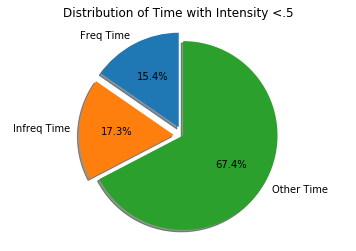

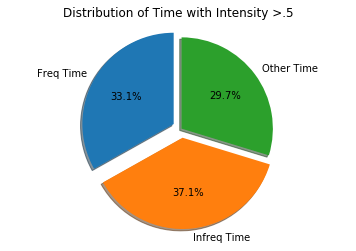

In [353]:

freq_time = [0,0]
infreq_time = [0,0]
other_time = [0,0]
for day in browser_days:
    if day[INTENSITY] <.5:
        freq_time[0] += math.exp(day[FREQ_TIME])
        infreq_time[0] += math.exp(day[INFREQ_TIME])
        other_time[0] += math.exp(day[OTHER_TIME])
    elif day[INTENSITY] > .5:
        freq_time[1] += math.exp(day[FREQ_TIME])
        infreq_time[1] += math.exp(day[INFREQ_TIME])
        other_time[1] += math.exp(day[OTHER_TIME])   
for i in range(0,2):
    pyplot.figure(765 + i)
    labels = 'Freq Time', 'Infreq Time', 'Other Time'
    sizes = [freq_time[i], infreq_time[i], other_time[i]]
    explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    pyplot.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")

0.08816328305377098


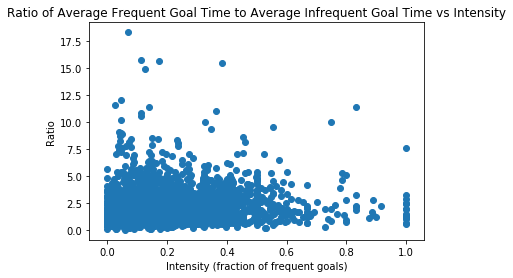

In [354]:
intensities = []
avg_freq_time = []
avg_infreq_time = []
ratio = []
from scipy import stats
for item in browser_days:
    if item[AVG_INFREQ_TIME] > 0 and item[AVG_FREQ_TIME] > 0:
        intensities.append(item[INTENSITY])
        avg_freq_time.append(item[AVG_FREQ_TIME])
        avg_infreq_time.append(item[AVG_INFREQ_TIME])
        ratio.append(item[AVG_FREQ_TIME]/item[AVG_INFREQ_TIME])
pyplot.figure(6246)
pyplot.title("Ratio of Average Frequent Goal Time to Average Infrequent Goal Time vs Intensity")
pyplot.xlabel("Intensity (fraction of frequent goals)")
pyplot.ylabel("Ratio")
pyplot.scatter(intensities, ratio)
slope, intercept, r_value, p_value, std_err = stats.linregress(intensities,ratio)
print(r_value)

<BarContainer object of 2 artists>

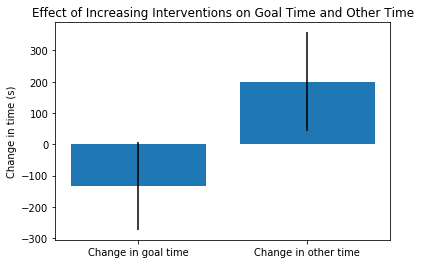

In [488]:
# Now let's try to generate that graph we made for Android -> change in time when goal changes frequency setting
user_goal_freq_avg = {}
for day in browser_days:
    user = day[HASH]
    if user not in user_goal_freq_avg:
        user_goal_freq_avg[user] = {}
    for goal_data in day[GOAL_TIMES]:
        if goal_data['goal'] != "www":
            if goal not in user_goal_freq_avg[user]:
                user_goal_freq_avg[user][goal] = {"time": {"frequent": [], "infrequent": []}, "other": {"frequent": [], "infrequent": []}}
            if (math.exp(day[TOTAL_TIME]) - math.exp(goal_data["time"])) > 0:
                user_goal_freq_avg[user][goal]["time"][goal_data["frequency"]].append(math.exp(goal_data["time"]))
                user_goal_freq_avg[user][goal]["other"][goal_data["frequency"]].append((math.exp(day[GOAL_TIME]) - math.exp(goal_data["time"])))
change_in_goal_time = []
change_in_other_time = []
for user in user_goal_freq_avg:
    for goal in user_goal_freq_avg[user]:
        goal_data = user_goal_freq_avg[user][goal]
        if len(goal_data["time"]["frequent"]) > 0 and len(goal_data["time"]["infrequent"]) > 0:
            mean_freq_time = mean(goal_data["time"]["frequent"])
            mean_infreq_time = mean(goal_data["time"]["infrequent"])
            mean_freq_other = mean(goal_data["other"]["frequent"])
            mean_infreq_other = mean(goal_data["other"]["infrequent"])
            change_in_goal_time.append(mean_freq_time - mean_infreq_time)
            change_in_other_time.append(mean_freq_other - mean_infreq_other)
pyplot.title("Effect of Increasing Interventions on Goal Time and Other Time")
pyplot.ylabel("Change in time (s)")
pyplot.bar(["Change in goal time", "Change in other time"], [(mean(change_in_goal_time)), mean(change_in_other_time)] , .8, yerr=[1.96 * sem(change_in_goal_time), 1.96 * sem(change_in_other_time)])
    

In [ ]:
pyplot.figure(123)
pyplot.hist([day[INTENSITY] for day in browser_days])